# Preprocessing
---
---

## Imports and Paths
---

In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(sys.path[-1])

/home/cotsios/dsit/2nd-semester/im-anal-and-proc/Img_analysis_assignment_2


In [2]:
BASE_DIR = os.path.dirname(os.getcwd())
DATA_DIR  = os.path.join(BASE_DIR, 'chest_xray')
MERGED_DIR = os.path.join(BASE_DIR, 'merged')
PREPROCESSED_DIR = os.path.join(BASE_DIR, 'preprocessed')

print(BASE_DIR)
print(DATA_DIR)
print(MERGED_DIR)
print(PREPROCESSED_DIR)

/home/cotsios/dsit/2nd-semester/im-anal-and-proc/Img_analysis_assignment_2
/home/cotsios/dsit/2nd-semester/im-anal-and-proc/Img_analysis_assignment_2/chest_xray
/home/cotsios/dsit/2nd-semester/im-anal-and-proc/Img_analysis_assignment_2/merged
/home/cotsios/dsit/2nd-semester/im-anal-and-proc/Img_analysis_assignment_2/preprocessed


In [3]:
from src.preprocessing import merge_splits, balance_dataset
from src.visualizations import plot_processed_image_grid_one_class

## Merge splits
---

The first step is to merge the pre-split data to handle the class imbalance and make better splits. The function `merge_splits` does exactly what it's name suggetst; it takes in a path with the pre-split data and another path and places all "NORMAL" and all "PNEUMONIA" images in folders inside the second path parameter.

In [4]:
issues = merge_splits(DATA_DIR, MERGED_DIR)
issues

Merging completed successfully.


[]

## Augment images and balance classes
---

The class `balance_dataset` balances the dataset by generating new images of the underrepresented class by augmenting it's images. Also, an image has a 50% chance to be augmented, just to introduce some variance to the dataset, when it's being moved to the `preprocessed` directory. Lastly, all images are resized to a specified size.

Possible augmentations are:
- Random rotation between -15 and 15 degrees
- Horizontal flip
- Brightness adhustment by a factor between 0.8 and 1.2
- Contrast adjustment by a factor between 0.8 and 1.2
- Zoom (in or out, crop or pad) by a factor between 0.8 and 1.2
- Random shift (translation) by a factor between -20 and 20 in the x and y axis
- Addition of salt and pepper noise (black and white pixels) taking up 2.5% of all pixels

In [5]:
balance_dataset(MERGED_DIR, PREPROCESSED_DIR)

Original counts - NORMAL: 1584, PNEUMONIA: 4274
Augmentations needed - NORMAL: 2690, PNEUMONIA: 0
Generating 2690 additional augmentations for NORMAL

Final counts - NORMAL: 4273, PNEUMONIA: 4273
Dataset balancing complete! Output saved to: /home/cotsios/dsit/2nd-semester/im-anal-and-proc/Img_analysis_assignment_2/preprocessed


Inspecting a random subset of images from both classes, we see that
- The images are all resized
- The augmentations were successful

NORMAL


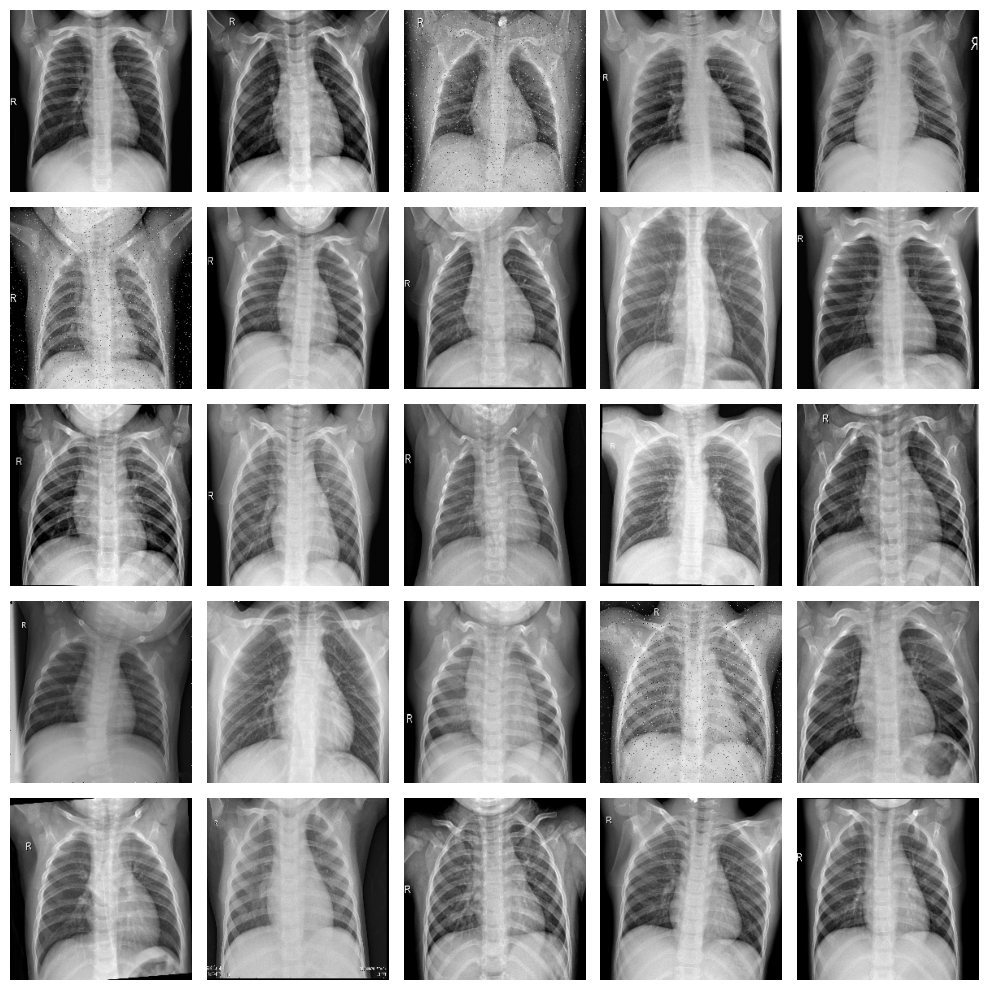

PNEUMONIA


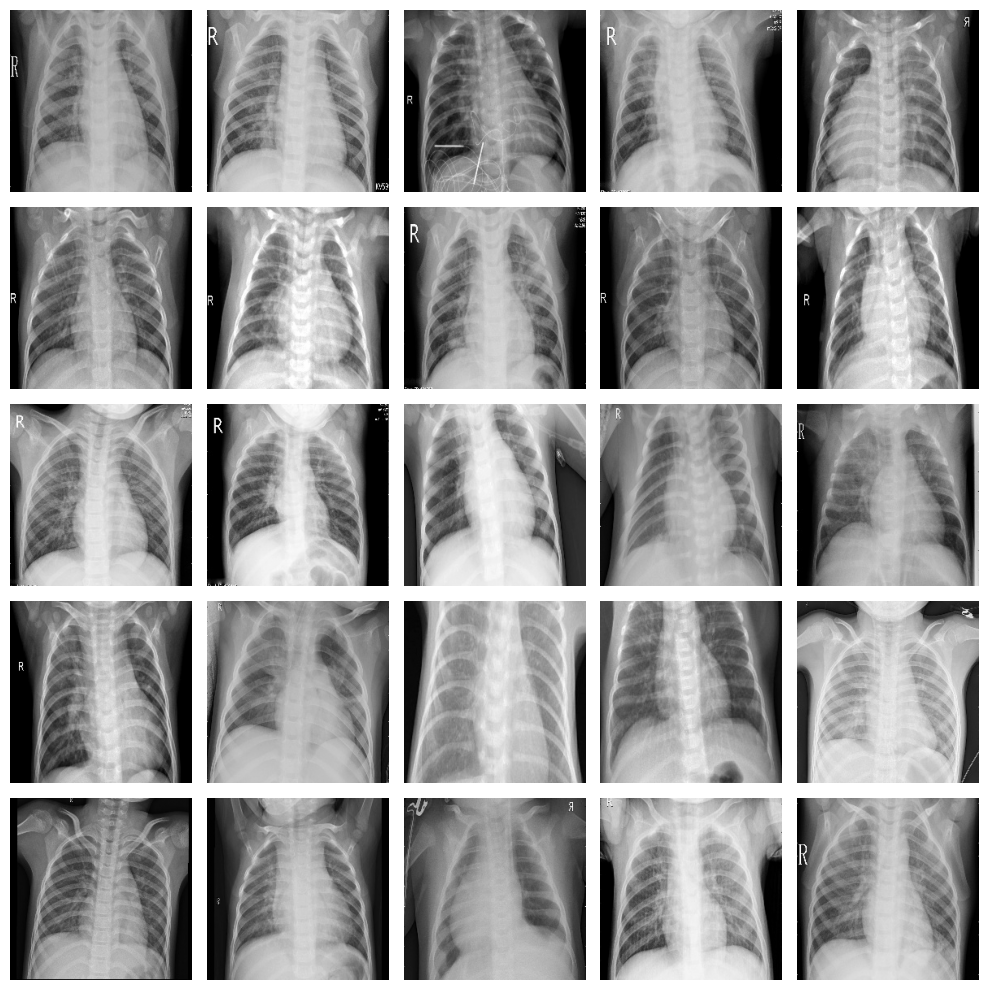

In [8]:
print("NORMAL")
plot_processed_image_grid_one_class(
    os.path.join(PREPROCESSED_DIR, 'NORMAL'), 25
)
print("PNEUMONIA")
plot_processed_image_grid_one_class(
    os.path.join(PREPROCESSED_DIR, 'PNEUMONIA'), 25
)